# ECON408: Computational Methods in Macroeconomics

AR(1) Models and Ergodicity

Jesse Perla (University of British Columbia)

# Overview

## Motivation and Materials

-   In this lecture, we will introduce our first stochastic process, the
    **AR(1)** process
-   This is a simple, univariate process, but it is directly useful in
    many cases
-   We will also introduce the concept of **ergodicity** to help us
    understand long-run behavior
-   While this section is not directly introducing new economic models,
    it provides the backbone for our analysis of the wealth and income
    distribution

## Deterministic Processes

-   We have seen deterministic processes in previous lectures, e.g. the
    linear

    $$
    X_{t+1} = a X_t + b
    $$

    -   These are coupled with an initial condition $X_0$, which enables
        us to see the evolution of a variable
    -   The state variable, $X_t$, could be a vector
    -   The evolution could be non-linear $X_{t+1} = h(X_t)$, etc.

-   But many states in the real world involve randomness

## Materials

-   Adapted from QuantEcon lectures coauthored with John Stachurski and
    Thomas J. Sargent
    -   [AR1
        Processes](https://julia.quantecon.org/introduction_dynamics/ar1_processes.html)
    -   [LLN and
        CLT](https://julia.quantecon.org/tools_and_techniques/lln_clt.html)

In [1]:
using LaTeXStrings, LinearAlgebra, Plots, Statistics
using Random, StatsPlots, Distributions
using Plots.PlotMeasures
default(;legendfontsize=16, linewidth=2, tickfontsize=12,
         bottom_margin=15mm)

# Random Variables Review

## Random Variables

-   **Random variables** are a collection of values with associated
    probabilities
-   For example, a random variable $Y$ could be the outcome of a coin
    flip
    -   Let $Y=1$ if heads and $Y=0$ if tails
    -   Assign probabilities $\mathbb{P}(Y=1) = \mathbb{P}(Y=0) = 0.5$
-   or a **normal random variable** with mean $\mu$ and variance
    $\sigma$, denoted $Y \sim \mathcal{N}(\mu, \sigma^2)$ has density
    $p(y) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{(y-\mu)^2}{2 \sigma^2} \right)$

## Discrete vs. Continuous Variables

-   If discrete (e.g., $X \in \{x_1, \ldots, x_N\}$) , then
    -   The **probability mass function** (pmf) is the probability of
        each value $p \in \mathbb{R}^N$
    -   Such that $\sum_{i=1}^N p_i = 1$, and $p_i \geq 0$
    -   i.e. $p_i = \mathbb{P}(X=x_i)$
-   If continuous, then the **probability density function** (pdf) is
    the probability of each value and can be represented by a function
    -   $p : \mathbb{R} \rightarrow \mathbb{R}$ if $X$ is defined on
        $\mathbb{R}$
    -   $\int_{-\infty}^\infty p(x) dx = 1$, and $p(x) \geq 0$
    -   $\mathbb{P}(X = a) = 0$ in our examples, and
        $\mathbb{P}(X \in [a,b]) = \int_a^b p(x) dx$

## Normal Random Variables


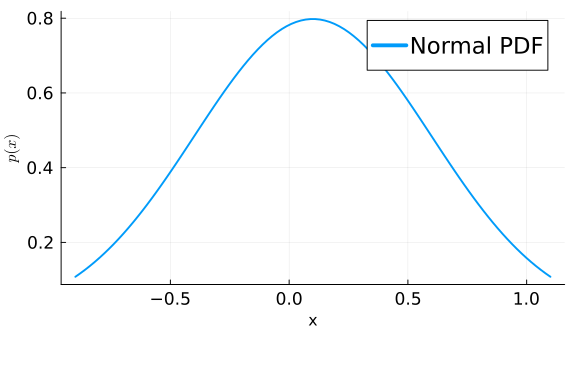

In [2]:
mu = 0.1
sigma = 0.5
d = Normal(0.1, sigma) # SD not variance
x = range(mu - 2 * sigma,
          mu + 2 * sigma;
          length=100)
plot(x, pdf.(d, x); label="Normal PDF",
     xlabel="x", ylabel=L"p(x)",
     size=(600,400))

## Comparing to a Histogram


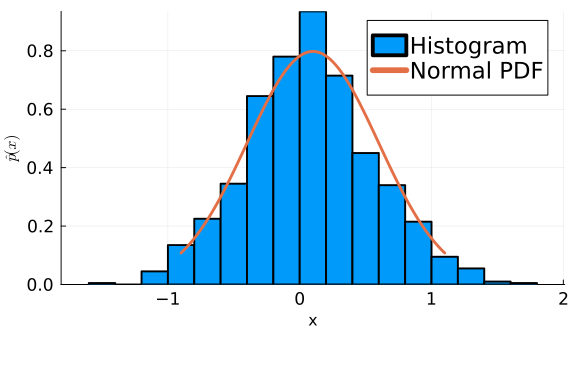

In [3]:
n = 1000
x_draws = rand(d, n) # gets n samples
histogram(x_draws; label="Histogram",
          xlabel="x", ylabel=L"\hat{p}(x)",
          normalize=true, size=(600,400))
plot!(x, pdf.(d, x); label="Normal PDF",
      lw=3)          

## Normal Random Variables

-   Normal random variables are special for many reasons (e.g., central
    limit theorems)
-   They are the only continuous random variable with finite variance
    that is closed under linear combinations
    -   If $X \sim \mathcal{N}(\mu_X, \sigma_X^2)$ and
        $Y \sim \mathcal{N}(\mu_Y, \sigma_Y^2)$, then
    -   $a X + b Y \sim \mathcal{N}(a \mu_X + b \mu_Y, a^2 \sigma_X^2 + b^2 \sigma_Y^2)$
    -   Also true with multivariate normal distributions
-   Common transformation taking out mean and variance
    -   Could draw $Y \sim N(\mu, \sigma^2)$
    -   Or could draw $X \sim N(0,1)$ and then $Y = \mu + \sigma X$

## Expectations

-   For discrete-valued random variables

    $$
    \mathbb{E}[f(X)] = \sum_{i=1}^N f(x_i) p_i
    $$

-   For continuous valued random variables $$
    \mathbb{E}[f(X)] = \int_{-\infty}^\infty f(x) p(x) dx
    $$

## Moments

-   The **mean** of a random variable is the first moment,
    $\mathbb{E}[X]$
-   The **variance** of a random variable is the second moment,
    $\mathbb{E}[(X-\mathbb{E}[X])^2]$
    -   Note the recentering by the mean. Could also calculate as
        $\mathbb{E}[X^2] - \mathbb{E}[X]^2$
-   Normal random variables are characterized by their first 2 moments

## Law(s) of Large Numbers

-   Let $X_1, X_2, \ldots$ be independent and identically distributed
    (iid) random variables with mean
    $\mu \equiv \mathbb{E}(X) < \infty$, then let $$
    \bar{X}_n \equiv \frac{1}{n} \sum_{i=1}^n X_i
    $$

-   One version is **Kolmogorov’s Strong Law of Large Numbers** $$
    \mathbb{P} \left( \lim_{n \rightarrow \infty} \bar{X}_n = \mu \right) = 1
    $$

    -   i.e. the average of the random variables converges to the mean

## Sampling and Plotting the Mean

In [4]:
function ksl(distribution, n = 100)
    title = nameof(typeof(distribution))
    observations = rand(distribution, n)
    sample_means = cumsum(observations) ./ (1:n)
    mu = mean(distribution)
    plot(repeat((1:n)', 2), [zeros(1, n); observations']; title,  xlabel="n",
         label = "", color = :grey, alpha = 0.5)
    plot!(1:n, observations; color = :grey, markershape = :circle,
          alpha = 0.5, label = "", linewidth = 0)
    if !isnan(mu)
        hline!([mu], color = :black, linewidth = 1.5, linestyle = :dash,
               grid = false, label = L"\mathbb{E}[X]")
    end
    return plot!(1:n, sample_means, linewidth = 3, alpha = 0.6, color = :green, label = L"\bar{X}_n")
end

ksl (generic function with 2 methods)

## LLN with the Normal Distribution


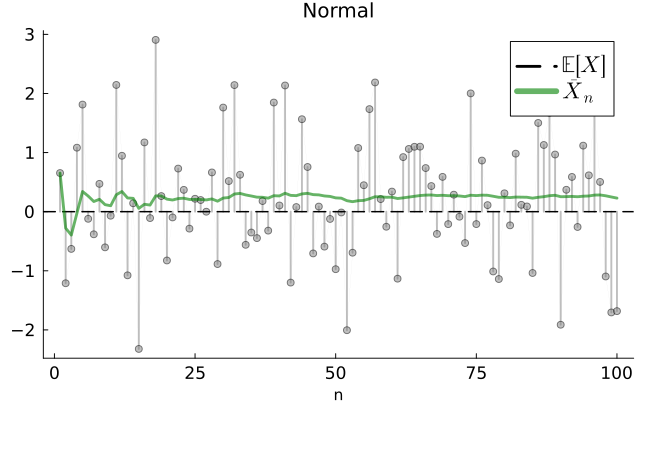

In [5]:
dist = Normal(0.0, 1.0) # unit normal
ksl(dist)

## LLN with the Exponential


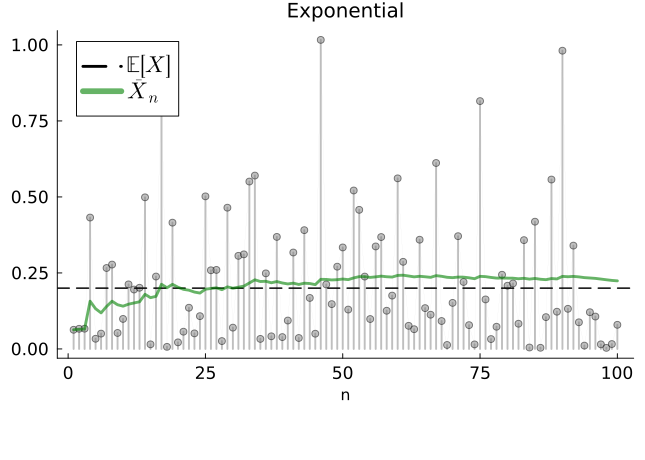

In [6]:
dist = Exponential(0.2)
ksl(dist)

## LLN with the Cauchy


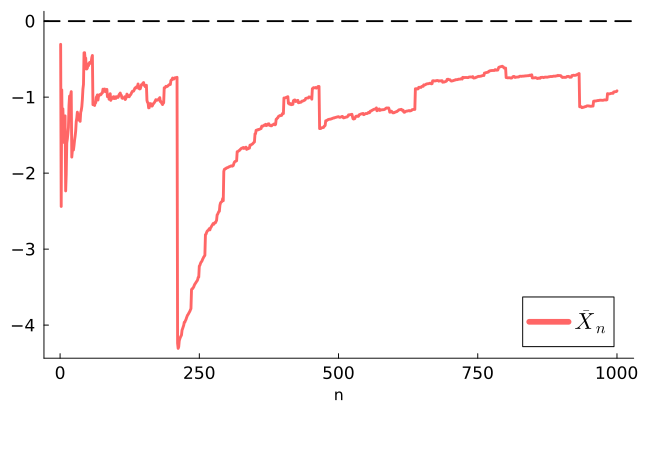

In [7]:
Random.seed!(0); # reproducible results
dist = Cauchy() # Doesn't have an expectation!
sample_mean = cumsum(rand(dist, n)) ./ (1:n)
plot(1:n, sample_mean, color = :red, alpha = 0.6, label =  L"\bar{X}_n",
      xlabel = "n", linewidth = 3)
hline!([0], color = :black, linestyle = :dash, label = "", grid = false)

## Monte-Carlo Calculation of Expectations

-   One application of this is the numerical calculation of expectations

-   Let $X$ be a random variable with density $p(x)$, and hence
    $\mathbb{E}[f(X)] = \int_{-\infty}^\infty f(x) p(x) dx$ (or
    $\sum_{i=1}^N f(x_i) p_i$ if discrete)

-   These integrals are often difficult to calculate analytically, but
    if we can draw $X \sim p$, then we can approximate the expectation
    by

    $$
    \mathbb{E}[f(X)] \approx \frac{1}{n} \sum_{i=1}^n f(x_i)
    $$

-   Then by the LLN this converges to the true expectation as
    $n \rightarrow \infty$

## Discrete Example

-   Let $X$ be a discrete random variable with $N$ states and
    probabilities $p_i$
-   Then $\mathbb{E}[f(X)] = \sum_{i=1}^N f(x_i) p_i$
-   For example, the Binomial distribution and $f(x) = \log(x+1)$

In [8]:
# number of trials and probability of success
dist = Binomial(10, 0.5)
plot(dist;label="Binomial PMF",
     size=(600,400))
vals = support(dist) # i.e. 0:10
p = pdf.(dist, vals)
# Calulate the expectation manually
@show mean(dist), dot(vals, p);

(mean(dist), dot(vals, p)) = (5.0, 5.000000000000008)

## Using Monte-Carlo

(f_expec, f_expec_mc) = (1.7526393207741702, 1.7552834928857293)


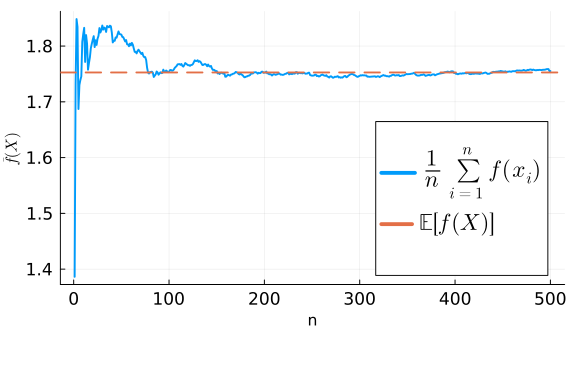

In [9]:
N = 500
# expectation with PMF, then MC
f_expec = dot(log.(vals .+ 1), p)
x_draws = rand(dist, N)
f_x_draws = log.(x_draws .+ 1)
f_expec_mc = sum(f_x_draws) / N
@show f_expec, f_expec_mc
# Just calculate sums then divide by N
f_means = cumsum(f_x_draws)./(1:N)
plot(1:length(f_means), f_means;
     label=L"\frac{1}{n}\sum_{i=1}^n f(x_i)",
     xlabel="n", ylabel=L"\bar{f}(X)",
     size=(600,400))
hline!([f_expec];linestyle = :dash,
       label = L"\mathbb{E}[f(X)]")

# Stochastic Processes

## Stochastic Processes

-   A **stochastic process** is a sequence of random variables
    -   We will focus on **discrete time** stochastic processes, where
        the sequence is indexed by $t=0,1,2,\ldots$
    -   Could be discrete or continuous random variables
-   Skipping through some formality, assume that they share the same
    values but probabilities may change
-   Denote then as a sequence $\{X_t\}_{t=0}^\infty$

## Joint, Marginal, and Conditional Distributions

-   Can ask questions on the probability distributions of the process
-   The **joint distribution** of $\{X_t\}_{t=0}^{\infty}$ or a subset
    -   In many cases things will be correlated over time or else no
        need to be a process
-   The **marginal distribution** of $X_t$ for any $t$
    -   This is a proper PDF, marginalized from the joint distribution
        of all values
-   **Conditional distributions**, fixing some values
    -   e.g. $X_{t+1}$ given $X_t, X_{t-1}$, etc. are known

## AR(1) Process

$$
X_{t+1} = a X_t + b + c W_{t+1}
$$

-   Just added randomness to the deterministic process from time $t$ to
    $t+1$
-   $W_{t+1} \sim \mathcal{N}(0, 1)$ is IID “shocks” or “noise”
-   Could have an initial condition for $X_0$ Or could have an initial
    distribution
    -   $X_t$ is a random variable, and so can $X_0$
    -   “Degenerate random variable” if $P(X_0 = x) = 1$ for some $x$
    -   Assume $X_0 \sim \mathcal{N}(\mu_0, v_0)$, and $v_0 \to 0$ is
        the degenerate case

## Markov Process

-   Before we go further, lets discuss a broader class of these
    processes useful in economics
-   A **Markov process** is a stochastic process where the conditional
    distribution of $X_{t+1}$ given $X_t, X_{t-1}, \ldots$ is the same
    as the conditional distribution of $X_{t+1}$ given $X_t$
    -   i.e. the future is independent of the past given the present
-   Note that with the AR(1) model, if I know $X_t$ then I can calculate
    the PDF of $X_{t+1}$ directly without knowing the past
-   This is “first-order” since only one lag is required, but could be
    higher order
    -   A finite number of lags can always be added to the state vector
        to make it first-order

## Evolution of the AR(1) Process

-   Both $W_{t+1}$ and $X_0$ are assumed to be normally distributed
-   As we discussed, linear combinations of normal random variables are
    normal
    -   So $X_t$ is normal for all $t$ by induction
-   Furthermore, we have a formula for the recursion
    -   If $X_t \sim \mathcal{N}(\mu_t, v_t)$, then
        $X_{t+1} \sim \mathcal{N}(a \mu_t + b, a^2 v_t + c^2)$
    -   Hence, the evolution of the mean and variance follow a simple
        difference equation $\mu_{t+1} = a \mu_t + b$ and
        $v_{t+1} = a^2 v_t + c^2$
    -   Let $X_t \sim \psi_t \equiv \mathcal{N}(\mu_t, v_t)$

## Visualizing the AR(1) Process

In [10]:
a = 0.9
b = 0.1
c = 0.5

# initial conditions mu_0, v_0
mu = -3.0
v = 0.6

0.6

## Visualizing the AR(1) Process


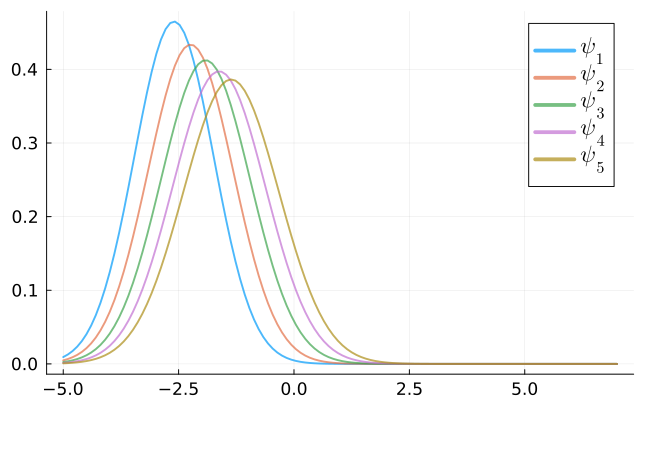

In [11]:
sim_length = 5
x_grid = range(-5, 7, length = 120)

plt = plot()
for t in 1:sim_length
    mu = a * mu + b
    v = a^2 * v + c^2
    dist = Normal(mu, sqrt(v))
    plot!(plt, x_grid, pdf.(dist, x_grid),
    label = L"\psi_{%$t}", linealpha = 0.7)
end
plt

## From a Degenerate Initial condition


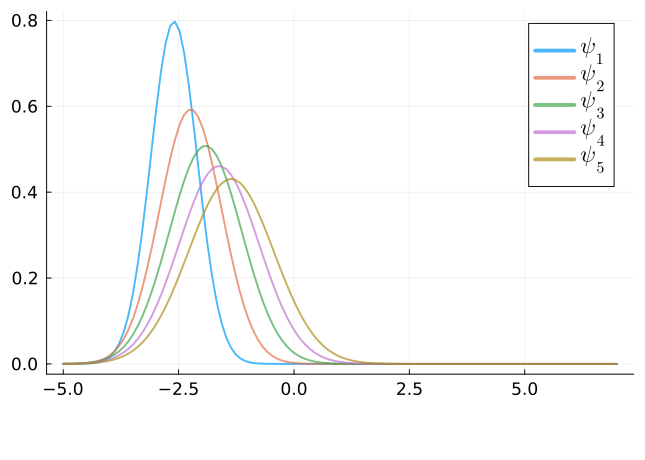

In [12]:
mu = -3.0
v = 0.0
plt = plot()
for t in 1:sim_length
    mu = a * mu + b
    v = a^2 * v + c^2
    dist = Normal(mu, sqrt(v))
    plot!(plt, x_grid, pdf.(dist, x_grid),
    label = L"\psi_{%$t}", linealpha = 0.7)
end
plt